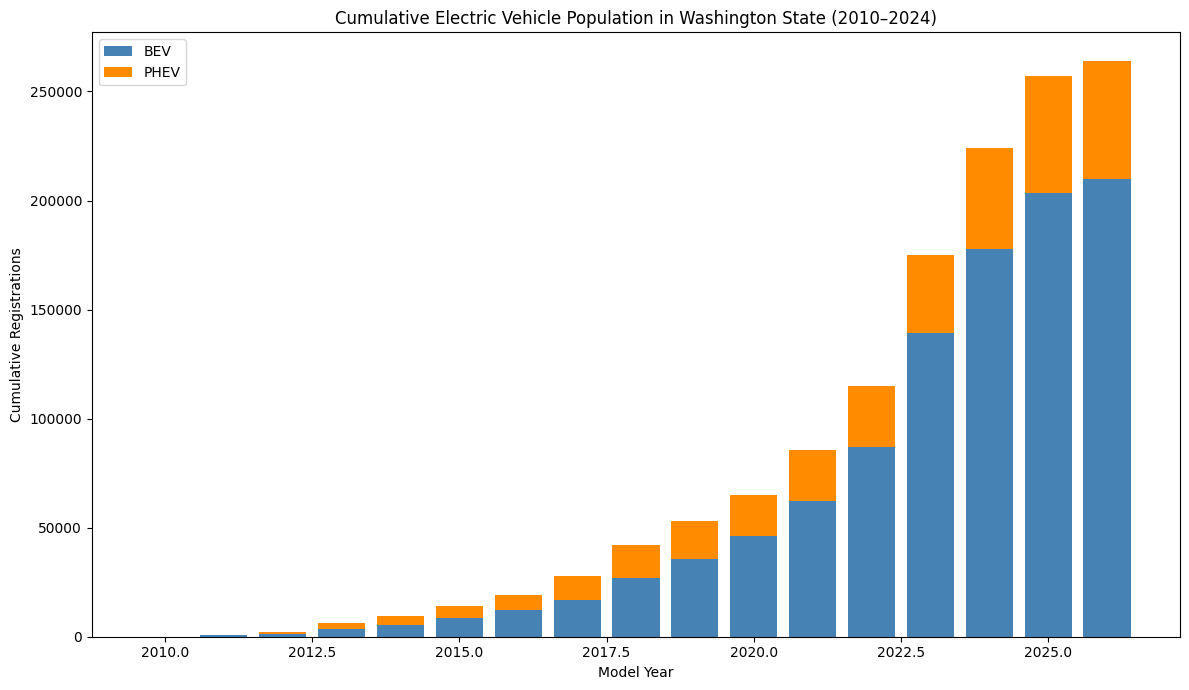

In [ ]:
# IMPORTING LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt

# LOAD DATA
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

# CLEANING
df = df.dropna()

# FILTER DATA
df = df[df["Model Year"] >= 2010]
df = df[df["Electric Vehicle Type"].isin([
    "Battery Electric Vehicle (BEV)",
    "Plug-in Hybrid Electric Vehicle (PHEV)"
])]

df["EV_Type"] = df["Electric Vehicle Type"].replace({
    "Battery Electric Vehicle (BEV)": "BEV",
    "Plug-in Hybrid Electric Vehicle (PHEV)": "PHEV"
})

# AGGREGATION
annual_counts = df.groupby(["Model Year", "EV_Type"]).size().reset_index(name="Count")
pivot = annual_counts.pivot(index="Model Year", columns="EV_Type", values="Count").fillna(0)

# CUMULATIVE SUM
pivot["BEV_Cumulative"] = pivot["BEV"].cumsum()
pivot["PHEV_Cumulative"] = pivot["PHEV"].cumsum()

cumulative_df = pivot[["BEV_Cumulative", "PHEV_Cumulative"]]

# VISUALIZATION: STACKED BAR CHART
plt.figure(figsize=(12, 7))

years = cumulative_df.index
bev_vals = cumulative_df["BEV_Cumulative"]
phev_vals = cumulative_df["PHEV_Cumulative"]

plt.bar(years, bev_vals, label="BEV", color="steelblue")
plt.bar(years, phev_vals, bottom=bev_vals, label="PHEV", color="darkorange")

plt.title("Cumulative Electric Vehicle Population in Washington State (2010–2024)")
plt.xlabel("Model Year")
plt.ylabel("Cumulative Registrations")
plt.legend(loc="upper left")
plt.tight_layout()

plt.show()


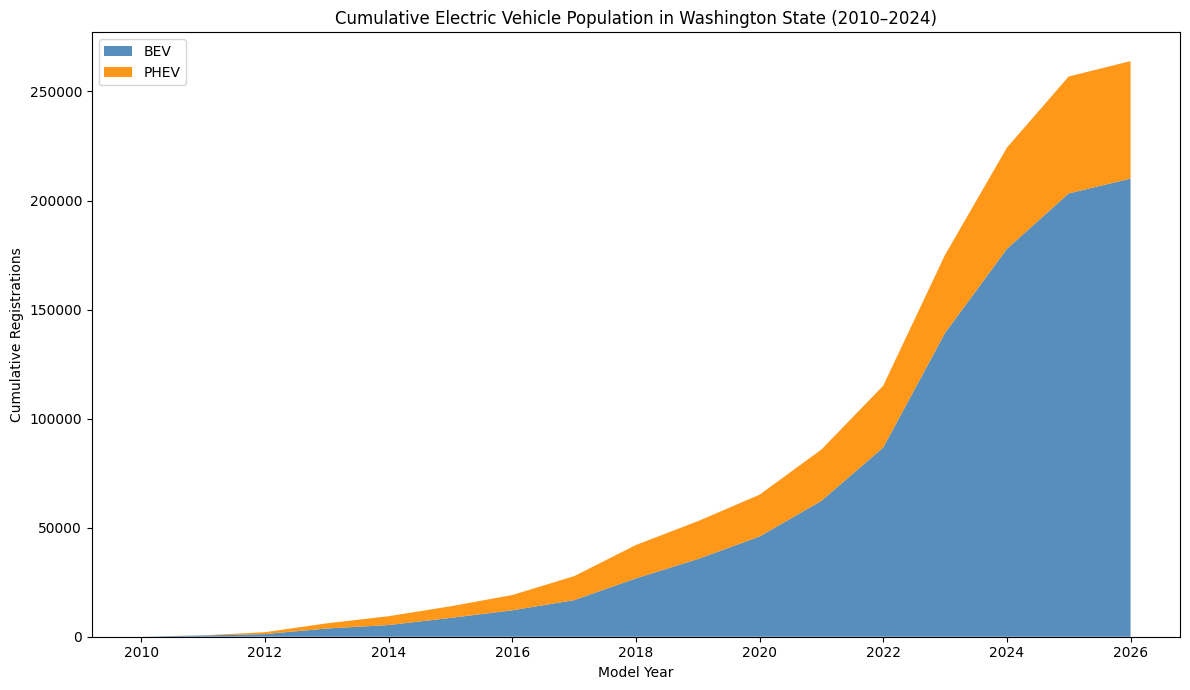

In [ ]:



# VISUALIZATION: STACKED AREA CHART
plt.figure(figsize=(12, 7))

plt.stackplot(
    cumulative_df.index,
    cumulative_df["BEV_Cumulative"],
    cumulative_df["PHEV_Cumulative"],
    labels=["BEV", "PHEV"],
    colors=["steelblue", "darkorange"],
    alpha=0.9
)

plt.title("Cumulative Electric Vehicle Population in Washington State (2010–2024)")
plt.xlabel("Model Year")
plt.ylabel("Cumulative Registrations")
plt.legend(loc="upper left")
plt.tight_layout()

plt.show()
